# asset.py notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from labellines import labelLines

import sys 
sys.path.append('/Users/rdel1jrk/Documents/dev/caboodle')
from typing import Callable

from model.asset import Asset, depreciation_fx

The plot below shows the basic model of depreciation, value as a function of time, before accounting for maintenance, repair, etc. The shape parameter k, controls the shape of the function. T is the time over which the asset is fully depreciated, in the absense of recapitalization.

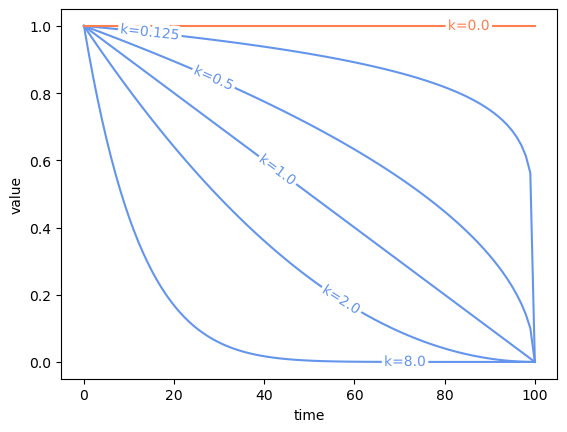

In [2]:
def ft(t: float, T: float, k: float) -> float:
    '''
    Portion depreciable asset value remaining as function of time.
    '''
    return (1 - t / T) ** k

xs = np.linspace(0, 100, 100)
shapes = [0.125, 0.5, 1.0, 2.0, 8.0]
for k in shapes:
    plt.plot(xs, ft(xs, 100, k), color='cornflowerblue', label=f'k={k}')
plt.plot(xs, ft(xs, 100, 0.0), color='coral', label=f'k=0.0')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.ylabel('value')
plt.xlabel('time')
plt.show()

This function is invertable for k $\neq$ 0.

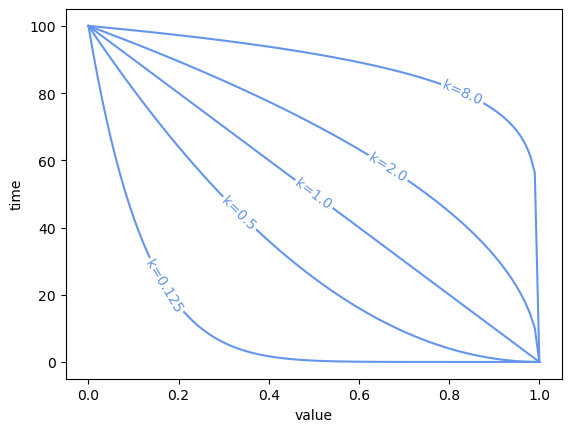

In [3]:
def inverse_ft(ft: float, T: float, k: float) -> float:
    '''
    Time period in schedule corresponding to given portion of depreciable asset value.
    '''
    return T * (1 - ft) ** (1 / k)

xs = np.linspace(0, 1, 100)
shapes = [0.125, 0.5, 1.0, 2.0, 8.0]
for k in shapes:
    plt.plot(xs, inverse_ft(xs, 100, k), color='cornflowerblue', label=f'k={k}')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.ylabel('time')
plt.xlabel('value')
plt.show()

An asset follows the depreciation schedule presented above if the required maintenance is performed. When less than the required maintenance is performed, this is models as an acceleration of the depreciation schedule. For instance, 

    Suppose an asset requires 1 unit of maintenance each year to maintain the linear depreciation schedule for k=1. In t=0 the asset value=1.0, if the required maintenance is performed in t=1 the asset value=0.99. However, if 0 units of maintenance are provided then in t=1 the asset value will be 0.98 (the value from the original depreciation schedule associated with t=2). If 0.5 units of maintenance are performed in t=1 the asset experiences 1.5 time periods of depreciation (e.g. 1 schedule time period of deprecaition and 0.5 units of unschedule depreciation since only 50% of the schedule maintenance was performed), thus its value will be 0.985.

The example below shows how the asset depreciates if no maintenance is performed, and how it would depreciate if all schedule maintenace were performed.

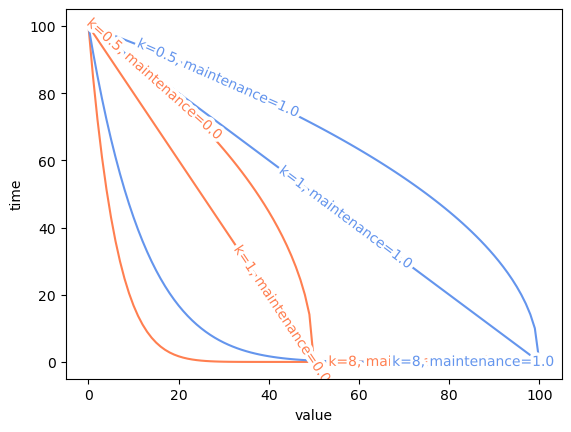

In [4]:
ks = [0.5, 1, 8]
for k in ks:
    ts = list(range(101))
    asset = Asset(initial_value=100.0)
    ys_none = [asset.initial_value]
    ys_full = [asset.initial_value]
    fx = depreciation_fx(asset, shape_parameter=k, acceleration_factor=1.0)
    for t in range(1, len(ts)):
        ys_none.append(fx(ys_none[-1], maintenance=0.0))
        ys_full.append(fx(ys_full[-1], maintenance=1.0))
    plt.plot(ts, ys_none, color='coral', label=f'k={k}, maintenance=0.0')
    plt.plot(ts, ys_full, color='cornflowerblue', label=f'k={k}, maintenance=1.0')
labelLines(plt.gca().get_lines(), zorder=2.5)
plt.ylabel('time')
plt.xlabel('value')
plt.show()  